# Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing

FILENAME = "train.csv"
df = pd.read_csv(FILENAME)
df.columns

C:\Users\User\AppData\Local\Temp\ipykernel_18208\3882749003.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Index(['Year', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9',
       'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19',
       'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29',
       'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39',
       'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49',
       'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59',
       'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69',
       'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79',
       'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89'],
      dtype='object')

# Split The Dataset

In [2]:
from sklearn.model_selection import train_test_split

def my_train_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return(X_train, X_test, y_train, y_test)

def my_train_validation_test():
    X = df.iloc[:, 1:]
    y = df[["Year"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
    return(X_train, X_val, y_train, y_val, X_test, y_test)

In [3]:
X_train, X_test, y_train, y_test = my_train_test()

# Show Data Distribution

In [4]:
import matplotlib.pyplot as plt

def histogram(column_name):
    data = X_train[column_name]
    plt.hist(data)
    plt.show()

def all_histograms(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Istogramma della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Frequenza')
        plt.grid(True)
        plt.show()

def boxplot_y():
    data = y_train["Year"]
    plt.boxplot(data, whis=1.5)
    plt.show()

def density_plots(df):
    for col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.displot(df[col], kind="kde", fill=True)
        plt.title(f'Densità di probabilità della colonna {col}')
        plt.xlabel('Valore')
        plt.ylabel('Densità')
        plt.grid(True)
        plt.show()

# Pre-processing

In [5]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)

In [5]:
#Normalization
def plot_norm(x, x_normalized):
    plt.subplot(2, 1, 1)
    plt.plot(x)
    plt.subplot(2, 1, 2)
    plt.plot(x_normalized)
    plt.show()

def norm(df, column_name, order):
    x = df[column_name]
    x_norm1 = np.linalg.norm(x, ord=order)
    x_normalized = x / x_norm1
    df[column_name] = x_normalized

    if order == 1:
        print(sum(x_normalized))
    if order == 2:
        print(sum(x_normalized**2))
    if order == np.inf:
        print(max(x_normalized))

def min_max_sc(X_val = None):
    #MinMax Scaling
    min_max_scaler = preprocessing.MinMaxScaler()
    min_max_scaler.fit(X_train)
    X_train_minmax = min_max_scaler.transform(X_train)
    X_test_minmax = min_max_scaler.transform(X_test)
    if X_val is not None:
        X_val_minmax = min_max_scaler.transform(X_val)
        return (X_train_minmax, X_test_minmax, X_val_minmax)
    else:
        return (X_train_minmax, X_test_minmax)

def standardization(X_val = None):
    #Standardization
    scaler = preprocessing.StandardScaler()
    #Addestramento
    scaler.fit(X_train)
    #Applicazione
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    if X_val is not None:
        X_val_scaled = scaler.transform(X_val)
        return (X_train_scaled, X_test_scaled, X_val_scaled)
    else:
        return (X_train_scaled, X_test_scaled)

X_train_norm1 = X_train.copy()
X_train_norm2 = X_train.copy()
X_train_normInf = X_train.copy()

In [6]:
X_train_minmax, X_test_minmax = min_max_sc()
X_train_scaled, X_test_scaled = standardization()

PCA

In [7]:
from sklearn.decomposition import PCA

def f_pca(num_components = None, X_val_scaled = None):
    if num_components is not None:
        pca = PCA(n_components=num_components)
    else: pca = PCA()
    principals_components_train = pca.fit_transform(X_train_scaled)

    # Trasforma il set di test utilizzando la stessa PCA addestrata sul set di addestramento
    principals_components_test = pca.transform(X_test_scaled)

    #loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)], index=X_train.columns)
    #print(loadings)
    if X_val_scaled is not None:
        principals_components_val = pca.transform(X_val_scaled)
        return (principals_components_train, principals_components_test, principals_components_val, pca)
    else:
        return (principals_components_train, principals_components_test, pca)

In [8]:
principals_components_train, principals_components_test, pca = f_pca(54)

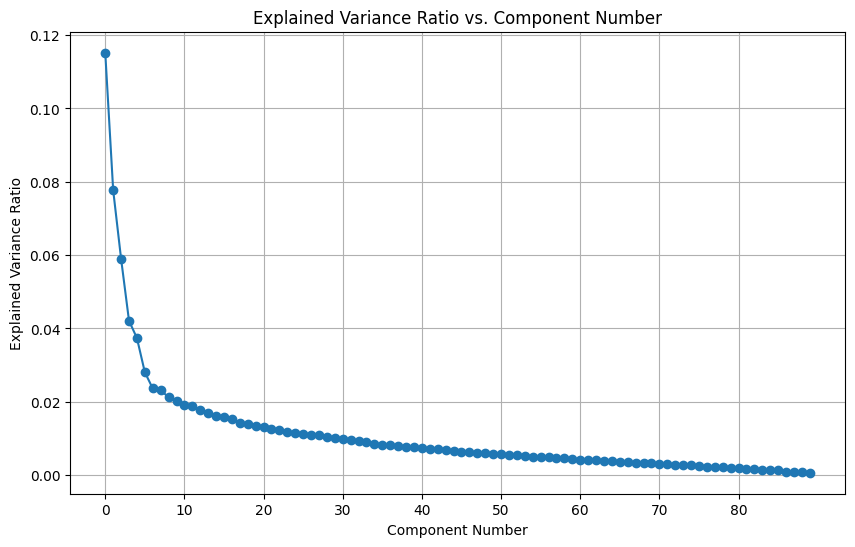

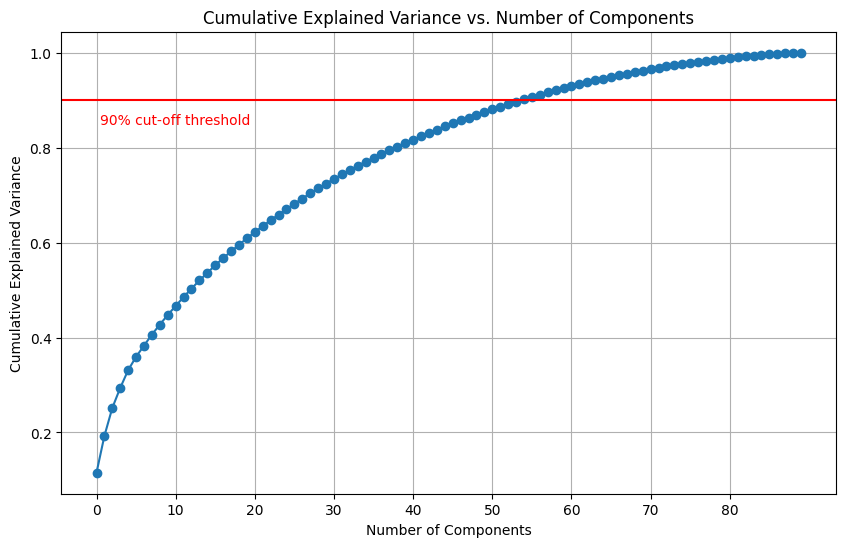

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

def find_optimal_num_components(X_train_scaled):
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot della explained variance ratio per ogni componente
    plt.figure(figsize=(10, 6))
    plt.plot(pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Component Number')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance Ratio vs. Component Number')
    plt.grid(True)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

    # Plot della cumulative explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance vs. Number of Components')
    plt.grid(True)
    plt.axhline(y=0.9, color='red', linestyle='-')
    plt.text(0.5, 0.85, '90% cut-off threshold', color = 'red', fontsize=10)
    plt.xticks(np.arange(0, len(pca.explained_variance_ratio_), step=10))
    plt.show()

# Usa questa funzione per trovare il numero ottimale di componenti principali
find_optimal_num_components(X_train_scaled)


In [11]:
# # Calcola la media dei valori assoluti dei carichi per ciascun componente principale
# mean_abs_loadings = loadings.abs().mean()

# # Ordina i carichi in ordine decrescente di importanza
# sorted_loadings = mean_abs_loadings.sort_values(ascending=False)

# print("Componenti Principali più importanti:")
# print(sorted_loadings)


In [12]:
# # Calcola gli autovalori dall'oggetto PCA
# eigenvalues = pca.explained_variance_

# # Visualizza gli autovalori
# print("Autovalori dei Componenti Principali:")
# for i, eig in enumerate(eigenvalues, 1):
#     print(f"PC{i}: {eig}")

# # Puoi anche visualizzarli in un grafico a barre per una migliore comprensione della distribuzione
# plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
# plt.xlabel('Componente Principale')
# plt.ylabel('Autovalore')
# plt.title('Autovalori dei Componenti Principali')
# plt.show()

In [13]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# # Considerando che principals_components è un array numpy con tre colonne
# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111, projection='3d')

# # Estraiamo le colonne per l'asse x, y e z
# x = principals_components_train[:, 0]
# y = principals_components_train[:, 1]
# z = principals_components_train[:, 2]

# # Plot dello scatter tridimensionale
# ax.scatter(x, y, z, c=y_train['Year'], marker='o')

# # Etichette degli assi
# ax.set_xlabel('Componente Principale 1')
# ax.set_ylabel('Componente Principale 2')
# ax.set_zlabel('Componente Principale 3')

# plt.title('Scatter Plot dei Componenti Principali')
# plt.show()


In [14]:
# # Set a threshold for which features to extract
# threshold = 0.3

# # Find features with loadings above the threshold for each principal component
# important_features = {}
# for column in loadings.columns:
#     important_features[column] = loadings.index[loadings[column].abs() > threshold].tolist()

# # Now 'important_features' dictionary contains the important features for each PC
# for pc, features in important_features.items():
#     print(f"{pc}: {', '.join(features)}")

# Modeling

Linear-Regressor

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def linearReg(X_train, y_train, X_test, y_test):
    #Linear-Regressor
    reg = LinearRegression().fit(X_train, y_train)

    predizioni = reg.predict(X_test)

    mse = mean_squared_error(y_test, predizioni)
    print("Mean Squared Error (MSE):", mse)

    r_squared = r2_score(y_test, predizioni)
    print("Coefficienti di determinazione R²:", r_squared)

    mae = mean_absolute_error(y_test, predizioni)
    print("Mean Absolute Error (MAE):", mae)

In [11]:
linearReg(X_train, y_train, X_test, y_test)
linearReg(X_train_minmax, y_train, X_test_minmax, y_test)
linearReg(X_train_scaled, y_train, X_test_scaled, y_test)
linearReg(principals_components_train, y_train, principals_components_test, y_test)

Mean Squared Error (MSE): 84.06098943629034
Coefficienti di determinazione R²: 0.2305423370961881
Mean Absolute Error (MAE): 6.611215120501444
Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Absolute Error (MAE): 6.611215120501474
Mean Squared Error (MSE): 84.06098943629036
Coefficienti di determinazione R²: 0.230542337096188
Mean Absolute Error (MAE): 6.611215120501461
Mean Squared Error (MSE): 95.8691480341564
Coefficienti di determinazione R²: 0.12245559937348105
Mean Absolute Error (MAE): 7.319528135226878


Random-Forest-Regressor

In [ ]:
X_train, X_val, y_train, y_val, X_test, y_test = my_train_validation_test()
X_train_scaled, X_test_scaled, X_val_scaled = standardization(X_val)
principals_components_train, principals_components_test, principals_components_val, pca = f_pca(55, X_val_scaled)

In [17]:
from sklearn.ensemble import RandomForestRegressor

def randomForest(X_train, y_train, X_test, y_test, n_alberi):
    rf_regressor = RandomForestRegressor(n_estimators=n_alberi, random_state=42)
    rf_regressor.fit(X_train, y_train)
    rf_predictions = rf_regressor.predict(X_test)
    mse = mean_squared_error(y_test, rf_predictions)
    r_squared = r2_score(y_test, rf_predictions)

    print("Mean Squared Error (MSE):", mse)
    print("Coefficienti di determinazione R²:", r_squared)

In [18]:
# randomForest(principals_components_train, y_train, principals_components_test, y_test, 100)

In [19]:
# from sklearn.ensemble import RandomForestRegressor

# n_estimators_values = [10, 50, 100, 200, 300]
# mse_values = []

# for n_estimators in n_estimators_values:
#     modello_random_forest = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
#     modello_random_forest.fit(X_train, y_train)
    
#     predizioni_val = modello_random_forest.predict(X_val)
    
#     mse_val = mean_squared_error(y_val, predizioni_val)
    
#     mse_values.append(mse_val)

# # Plot dei risultati
# plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_values, mse_values, marker='o', linestyle='-')
# plt.title('MSE al variare del numero di alberi nel RandomForestRegressor')
# plt.xlabel('Numero di alberi')
# plt.ylabel('MSE')
# plt.grid(True)
# plt.show()

SVM

In [20]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVR

def svr(num_fold, X_train, y_train, X_test, y_test):
    # Definisci la griglia dei parametri da testare
    param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 10, 50, 100]
    }

    # Inizializza il regressore SVM
    svm_regressor = SVR()

    # Definisci il numero di fold per la cross-validation
    num_folds = num_fold

    # Inizializza il KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Crea un oggetto GridSearchCV per trovare i migliori parametri con la k-fold cross-validation
    grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

    # Esegui la cross-validation per trovare i migliori parametri
    grid_search.fit(X_train, y_train)

    # Stampa i migliori parametri trovati
    print("Migliori parametri:", grid_search.best_params_)

    # Valuta il modello con la migliore combinazione di parametri
    best_svm_regressor = grid_search.best_estimator_

    # Valuta il modello sui dati di test
    y_pred = best_svm_regressor.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)

In [21]:
# svr(5, principals_components_train, y_train, principals_components_test, y_test)

KNN

In [22]:
from sklearn.neighbors import KNeighborsRegressor
def knn(num_neig, X_train, y_train, X_test, y_test):
    neig = KNeighborsRegressor(n_neighbors=num_neig)
    neig.fit(X_train, y_train)
    y_pred = neig.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error sui dati di test:", mse_test)
    r_squared = r2_score(y_test, y_pred)
    print("Coefficienti di determinazione R²:", r_squared)


In [24]:
def knn_cv(X_train, y_train, X_val, y_val):
    # Definisci il range di iperparametri per il numero di vicini
    param_grid = {'n_neighbors': np.arange(1, 21)}

    # Inizializza il KNN Regressor
    knn = KNeighborsRegressor()

    # Inizializza la ricerca grid
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
    grid_search.fit(X_train, y_train)

    # Estrai i risultati della ricerca grid
    train_scores_mse = np.sqrt(-grid_search.cv_results_['mean_train_score'])  # Mean Squared Error sul train set
    test_scores_mse = np.sqrt(-grid_search.cv_results_['mean_test_score'])  # Mean Squared Error sul test set

    # Inizializza la ricerca grid per MAE
    grid_search_mae = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_absolute_error', return_train_score=True)
    grid_search_mae.fit(X_train, y_train)

    train_scores_mae = -grid_search_mae.cv_results_['mean_train_score']  # Mean Absolute Error sul train set
    test_scores_mae = -grid_search_mae.cv_results_['mean_test_score']  # Mean Absolute Error sul test set

    neighbors = param_grid['n_neighbors'] # Numero di vicini

    # Plot dell'ampliamento dell'errore al variare del numero di vicini
    plt.figure(figsize=(10, 6))
    #plt.plot(neighbors, train_scores, label='Train Error', marker='o')
    plt.plot(neighbors, test_scores_mae, label='Validation Error', marker='o')
    plt.xlabel('Number of Neighbors')
    plt.ylabel('MAE')
    plt.title('KNN Regression - Validation Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Trova il miglior modello
    best_neighbor = grid_search.best_params_['n_neighbors']
    best_model = grid_search.best_estimator_

    # Valida il miglior modello sul validation set
    y_pred_val = best_model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_pred_val)
    r_squared_val = r2_score(y_val, y_pred_val)

    print("Miglior numero di vicini:", best_neighbor)
    print("Mean Squared Error sui dati di validation:", mse_val)
    print("Coefficienti di determinazione R² sui dati di validation:", r_squared_val)

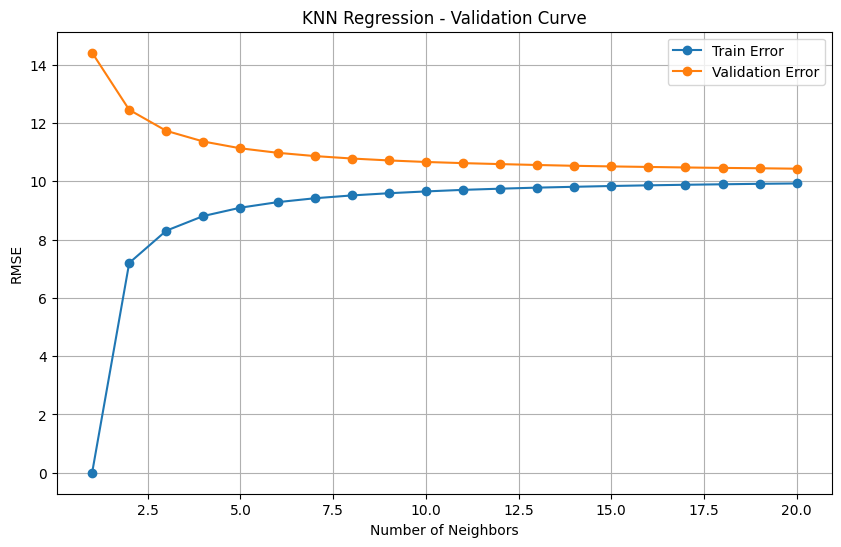

Miglior numero di vicini: 20
Mean Squared Error sui dati di validation: 107.34397685139287
Coefficienti di determinazione R² sui dati di validation: 0.020282756555151327


In [25]:
knn_cv(principals_components_train, y_train, principals_components_val, y_val)

Feed-Forward

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

class FeedForward(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(FeedForward, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

def prepare_data(X_train, y_train, X_val, y_val):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)

    return train_dataset, val_dataset

def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            #loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

def evaluate_model(model, val_loader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            predictions.extend(outputs.numpy())
            targets.extend(labels.numpy())
    predictions = np.array(predictions)
    targets = np.array(targets)
    mse = mean_squared_error(targets, predictions)
    r2 = r2_score(targets, predictions)
    return mse, r2

In [30]:
# Preparazione dei dati
train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definizione del modello
input_size = principals_components_train.shape[1]
hidden_size = 200
num_classes = 1
model = FeedForward(input_size, hidden_size, num_classes)

# Definizione della loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 10
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Valutazione del modello
mse, r2 = evaluate_model(model, val_loader)
print("Mean Squared Error sui dati di validation:", mse)
print("Coefficienti di determinazione R² sui dati di validation:", r2)


/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 1, 1])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Mean Squared Error sui dati di validation: 216.22725
Coefficienti di determinazione R² sui dati di validation: -0.9734834995049033


In [27]:
class FeedForwardPlus(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, depth=1):
        super(FeedForwardPlus, self).__init__()
        
        model = [
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        block = [
            nn.Linear(hidden_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU()
        ]

        for i in range(depth):
            model += block
            print("i = ", i)

        
        self.model = nn.Sequential(*model)
        
        self.output = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        h = self.model(x)
        out = self.output(h)
        return out

In [39]:
# Preparazione dei dati
train_dataset, val_dataset = prepare_data(principals_components_train, y_train, principals_components_val, y_val)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)

# Definizione del modello
input_size = principals_components_train.shape[1]
hidden_size = 800
num_classes = 1
depth = 1

model = FeedForwardPlus(input_size, hidden_size, num_classes, depth)

# Definizione della loss e dell'ottimizzatore
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Addestramento del modello
num_epochs = 7
train_model(model, train_loader, criterion, optimizer, num_epochs)

# Valutazione del modello
mse, r2 = evaluate_model(model, val_loader)
print(") Mean Squared Error sui dati di validation:", mse)
print(") Coefficienti di determinazione R² sui dati di validation:", r2)

i =  0


/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64, 1, 1])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9, 1, 1])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


) Mean Squared Error sui dati di validation: 287.51703
) Coefficienti di determinazione R² sui dati di validation: -1.6241379714255357


modelli deep per Tabular Data (TabNet &
TabTransformer)

In [ ]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_val = X_val.to_numpy()
y_val = y_val.to_numpy()

In [57]:
from pytorch_tabnet.tab_model import TabNetRegressor
kf = KFold(n_splits=5,random_state=42,shuffle=True)
predictions_array = []
CV_score = []



regressor = TabNetRegressor(verbose=0, seed=42)
regressor.fit(X_train=X_train,y_train=y_train,
    eval_set=[(X_val,y_val)],
    patience = 400,max_epochs=200,
    eval_metric = ['mse'])
CV_score.append(regressor.best_cost)
predictions_array.append(np.expm1(regressor.predict(X_test)))

predictions = np.mean(predictions_array,axis=0)


Stop training because you reached max_epochs = 200 with best_epoch = 196 and best_val_0_mse = 72.45028


/Users/leonardomarzocchi/anaconda3/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


KeyError: 0

In [48]:
print("score: %.5f" % np.mean(CV_score,axis=0))
print(CV_score)


score: 8.51177
[8.511773255905277]
